In [28]:
using LinearAlgebra, Distributions

In [54]:
using Plots 

In [3]:
#remark endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


## β-Hermite ensembles

* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.308.6290&rep=rep1&type=pdf
<img src="hermite.png" width=50%>

In [29]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [30]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 -2.09137   3.38142   ⋅        ⋅       …   ⋅         ⋅         ⋅ 
  3.38142  -2.43021  2.73106   ⋅           ⋅         ⋅         ⋅ 
   ⋅        2.73106  1.9099   3.00093      ⋅         ⋅         ⋅ 
   ⋅         ⋅       3.00093  1.69464      ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅       2.92539      ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅        ⋅       …   ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅        ⋅          1.50623    ⋅         ⋅ 
   ⋅         ⋅        ⋅        ⋅          3.41535   1.02784    ⋅ 
   ⋅         ⋅        ⋅        ⋅          1.02784  -1.49297   0.870526
   ⋅         ⋅        ⋅        ⋅           ⋅        0.870526  0.568241

In [31]:
n=10000;β=1;
@time F=eigen(T(n,β)/√(β*n))
list=F.values;

 23.978982 seconds (686.67 k allocations: 801.001 MiB, 0.06% gc time)


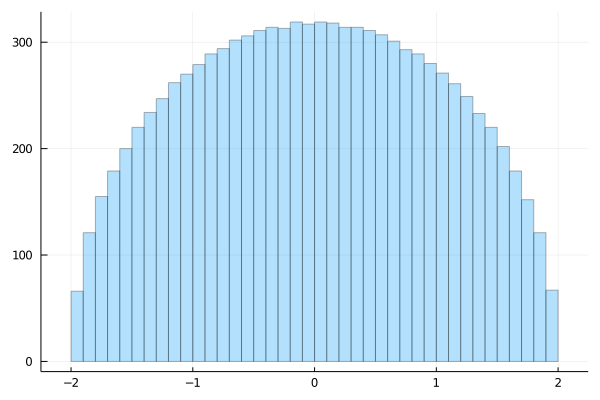

In [32]:
plot(size=(600, 320))
histogram(list,legend=false,norm=false,alpha=0.3,bin=-2:0.1:2)

In [11]:
@which eigen(T(n, β)/√(n*β))

eigen(A::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/tridiag.jl:280

## β-Laguerre ensembles

<img src="laguerre.png" width=50%>

In [33]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

In [151]:
# n*m 
n=1000
m=300
β=1;
X=B(n,m,β);
X=Array(X)

300×300 Array{Float64,2}:
 31.4723   0.0      0.0      0.0     …   0.0        0.0        0.0
 17.0359  31.1556   0.0      0.0         0.0        0.0        0.0
  0.0     17.5539  31.8004   0.0         0.0        0.0        0.0
  0.0      0.0     16.822   32.8439      0.0        0.0        0.0
  0.0      0.0      0.0     16.2658      0.0        0.0        0.0
  0.0      0.0      0.0      0.0     …   0.0        0.0        0.0
  0.0      0.0      0.0      0.0         0.0        0.0        0.0
  0.0      0.0      0.0      0.0         0.0        0.0        0.0
  0.0      0.0      0.0      0.0         0.0        0.0        0.0
  0.0      0.0      0.0      0.0         0.0        0.0        0.0
  0.0      0.0      0.0      0.0     …   0.0        0.0        0.0
  0.0      0.0      0.0      0.0         0.0        0.0        0.0
  0.0      0.0      0.0      0.0         0.0        0.0        0.0
  ⋮                                  ⋱                        
  0.0      0.0      0.0      0.0        

In [152]:
W=Transpose(X)*X
@time list1=eigen(W).values;

  0.024324 seconds (15 allocations: 2.169 MiB)


In [153]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

<img src="mp-law.png" width=50%>

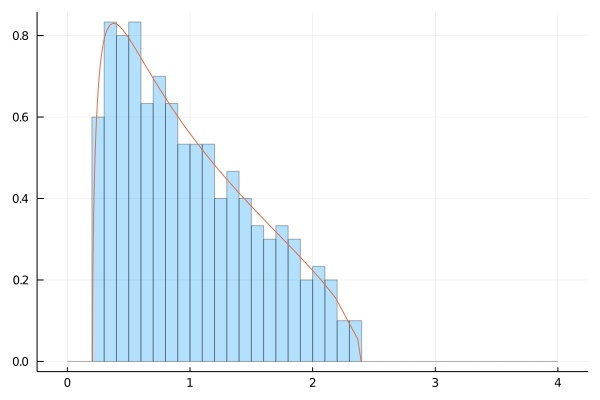

In [154]:
histogram(list1/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b)

  0.062690 seconds (13 allocations: 4.157 MiB)


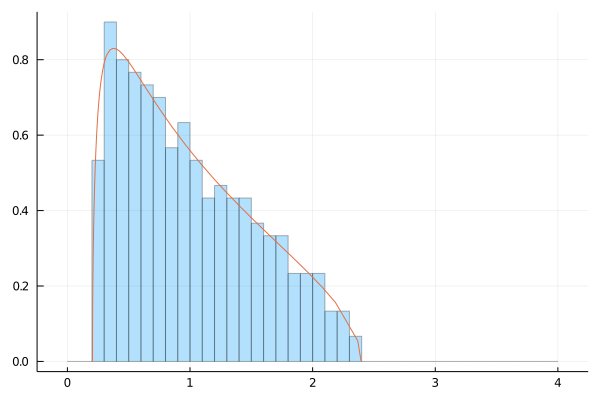

In [18]:
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)

## 課題1

In [116]:
list=[]
size=10^6;
β=1;
n=100;
@time for i=1:size
    append!(list,tr(T(n,β)))
end
mean(list)

  8.564603 seconds (9.00 M allocations: 2.631 GiB, 7.43% gc time)


0.015079153419959565

## β-Jacobi ensembles

In [ ]:
211.10831761185761, 219.68571061696292, 226.58580193726303, 232.70182123294995, 239.18227584937972, 242.70612591617353, 251.06386883317643, 254.38803743783924, 260.5355484102083, 264.4736550437665, 267.4202894311273, 275.3445264848918, 279.45169380241737, 280.9068683158761, 284.3857220087207, 288.7241160200464, 294.057365696494, 296.2734909107452, 304.56548885173714, 307.40000185210863, 311.5498579616034, 316.51529899375225, 320.4992554430045, 323.8814052349471, 326.81391669404695, 330.30334062188575, 333.0309686524856, 337.93814837633226, 343.0082673028814, 344.8525811508911, 350.34567387714554, 355.85634113545046, 360.9359368698557, 365.74854515996196, 367.1084669910366, 375.7139260319084, 377.466176476966, 383.8827982600594, 385.7309793082078, 388.2897415035042, 392.6579883304272, 395.65596180746394, 396.9361336767538, 400.55760885380437, 407.76830213109974, 410.68809664934486, 416.12893129112456, 420.97820521842425, 425.6698686587368, 427.2680298061935, 431.4045590621674, 433.0888825456114, 434.8189905818098, 443.8152769153947, 445.1495568821077, 451.00106523580484, 455.7036507919653, 457.9933993319826, 462.0066695748469, 469.4374246040702, 472.5355336734824, 473.5664608383797, 478.8144964539539, 487.3604119996064, 488.72585295154136, 496.6310020627908, 499.6420453555412, 506.95453652136473, 512.3733424059135, 516.4905305534451, 520.3713158531098, 524.1753953754996, 526.0071154466636, 532.291599612978, 534.9451530005754, 541.8267655929083, 546.736089910718, 548.0927597405935, 550.0539650340572, 555.1548547107631, 559.6602819074938, 562.1944475945215, 567.3756973787687, 570.8713709294436, 576.5428251447457, 579.242608666353, 583.8677384509775, 588.089271892298, 593.9081787844493, 599.3660467771517, 601.4377374809048, 611.0620864465673, 616.0141714609902, 622.2277840994918, 623.467001314325, 629.1710664629409, 634.5309285360324, 638.2235220568293, 641.5077253124432, 648.6366912448966, 654.9518152551722, 656.1104716498343, 661.4826501144435, 663.3913236476956, 667.1967150136404, 676.8402189323618, 679.8268179454709, 683.8876802465488, 686.2689562040176, 693.3548853869761, 699.3653965017013, 702.3127648605073, 711.8093184910365, 713.5616848930403, 717.435917147689, 719.2321818592908, 723.095639130658, 725.5483080464201, 733.8238122136868, 741.8971976817361, 743.6857005997085, 755.9824949237906, 759.3140962722366, 767.7870763643316, 768.589463865781, 777.5084295407366, 778.0529448751864, 787.7525210670344, 790.2444577843596, 795.320856831135, 799.0430179367609, 802.0103168243852, 805.7100975440778, 811.0420420184066, 815.1309523945797, 825.8333273641663, 829.0652270876585, 830.0160818892425, 834.9846601191666, 850.7848270439249, 855.8444050862624, 859.2068125327812, 863.8962574424834, 869.4583385524315, 873.7649663583229, 874.5779744535289, 887.1176706292395, 891.1259595846025, 893.7969559272929, 901.0113759463252, 902.7324643465258, 909.3596048270338, 913.9083397222275, 917.4904361011831, 920.83054033397, 925.9207994710181, 929.1084501884778, 939.6588362383523, 946.9580593436315, 951.4445106404421, 958.7089909190067, 960.3050376695915, 964.3568016158044, 971.2982141472567, 982.406584499457, 988.7504751058714, 993.6292748113424, 996.545623254726, 1006.092219061723, 1017.9165686926467, 1022.2769199632762, 1032.7029603098176, 1035.6689235271283, 1041.3022443740283, 1044.5076664553826, 1053.8223826366643, 1059.2019107661854, 1063.9469025446024, 1069.3295735931438, 1079.354990504607, 1087.8450556155258, 1093.8666321739888, 1105.7851157527243, 1107.7146660274575, 1113.6703566049382, 1125.549067243298, 1127.746550482601, 1130.7611128385502, 1135.382619135798, 1143.6853484794156, 1151.3292406049513, 1156.3092524973872, 1162.2766804414114, 1171.2216805942455, 1173.3189916268157, 1190.9023537376681, 1191.4348292195434, 1200.361270487041, 1204.0259645386952, 1208.8713347450148, 1217.184773915461, 1218.284931858775, 1233.8063140920933, 1236.2401975776834, 1247.551876758957, 1253.0472270285502, 1257.9323182377968, 1268.7975807994633, 1271.5372990319256, 1285.8838194339505, 1294.0956119909224, 1298.0719524835995, 1310.407090839562, 1316.9653423184848, 1323.0899889638413, 1332.65282094359, 1337.2290460490804, 1343.6257159846016, 1350.171804267434, 1356.4742343561234, 1366.460409258406, 1373.8483070888224, 1383.6506484339795, 1393.794061235308, 1401.132314870054, 1408.2145104481701, 1410.4338148606444, 1417.7408984468198, 1432.0897215409186, 1441.0972018176012, 1448.1151857868663, 1451.7936406111526, 1464.9022771385303, 1479.0579534139347, 1481.0415577127164, 1490.726438333068, 1492.0990933682488, 1505.2386860092356, 1516.8793209788932, 1521.268494733979, 1532.1401295659193, 1534.0664873186838, 1539.6963129002243, 1557.3611068478242, 1558.5111832147034, 1570.3775394282507, 1576.1205735949693, 1586.8021378978956, 1606.0980743960436, 1610.0322587947371, 1620.5828893202765, 1631.6783865748173, 1637.1134297675353, 1641.7088394104064, 1658.7947591128986, 1665.2971253287233, 1672.4720535534175, 1689.7257504874487, 1695.7632616528826, 1711.7515921903696, 1726.5568455510006, 1732.5451637399606, 1750.0012352719214, 1756.2512258292804, 1766.8745843627735, 1771.0742660540259, 1787.2933872062436, 1793.7811630987094, 1798.3532573057628, 1817.9553653581079, 1830.5897870214812, 1841.0824287795422, 1848.8471156414253, 1869.9628116812519, 1878.5644561435429, 1885.0055259067744, 1897.6383341363965, 1906.913450007066, 1916.0760069248477, 1945.6210144138931, 1953.4337008438395, 1965.5877001193717, 1979.708068742933, 1982.8759847675296, 2002.342514440075, 2018.2015513602903, 2046.439319641869, 2067.698702756994, 2089.3975168482475, 2117.6954339579333, 2135.5670796225536, 2160.804730498445, 2172.502601293506, 2200.346894633278, 2220.9777899696596, 2224.1448034950786, 2271.031200115171, 2294.2000054240953, 2347.1468428085595, 2361.6766469475015

## Forrester(2013) ：β-spiked Wishart ensembles
### 論文タイトル：Probability densities and distributions for spiked and general variance Wishart β-ensembles 

<img src="forrester_model.png" width=70%>

In [127]:
β=1;
n=8;
m=4;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√2)*X[1:1] #b=2 by Forrester
X

4×4 Array{Float64,2}:
 4.16671   0.0      0.0       0.0
 0.761603  1.80263  0.0       0.0
 0.0       1.28601  3.87031   0.0
 0.0       0.0      0.639745  1.91369

In [133]:
list=[]
size=10^6;
β=1;
n=8;
m=2;
b=6;
@time for i=1:size
    X=B(n,m,β)
    X=Array(X)
    X[1:1]=(√b)*X[1:1]
    F=maximum(svd(X).S)^2
    append!(list,F)
end
mean(list/b)

  7.698928 seconds (22.00 M allocations: 2.378 GiB, 20.50% gc time)


11.437319727262985

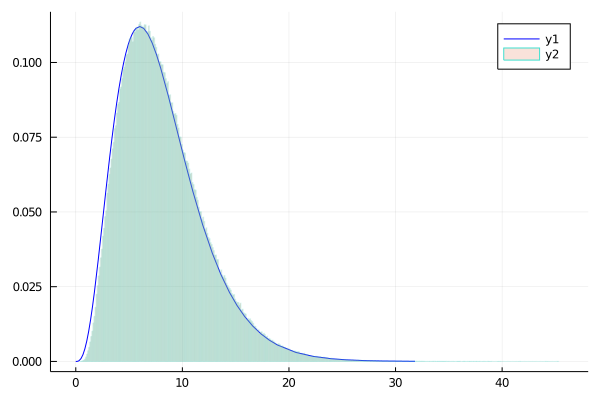

In [119]:
using StatPlots
d=Chisq(n)
plot(d,linecolor=:blue)
histogram!(list/b,norm=true,alpha=0.2,linecolor =:turquoise)

## MP則とスパイクモデル

In [208]:
n=5000;
m=300;
b1=2;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√b1)*X[1:1]

1-element Array{Float64,1}:
 100.87856353203453

In [209]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

  0.052372 seconds (13 allocations: 4.157 MiB)


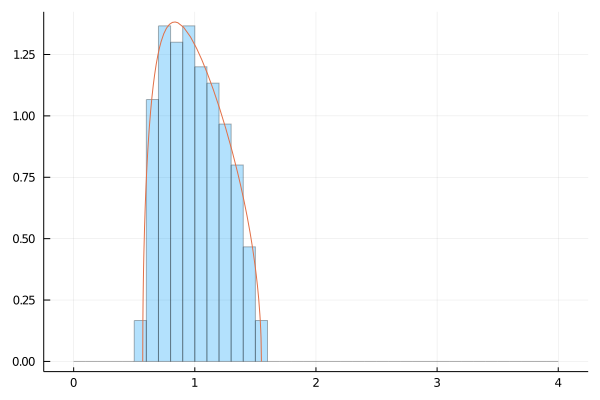

In [207]:
#スパイクモデルで検証
#n=5000;m=300;b1=1.3;
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)

  0.036191 seconds (13 allocations: 4.157 MiB)


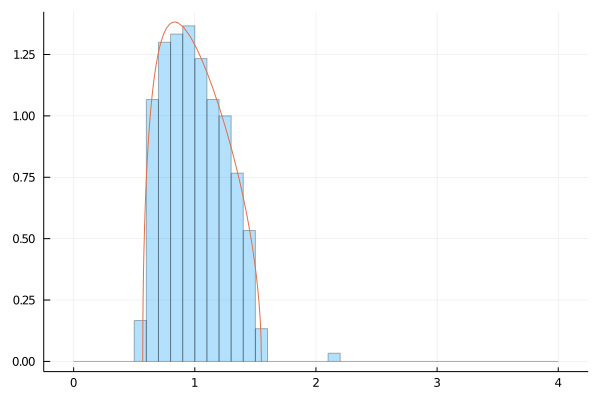

In [210]:
#スパイクモデルで検証
#n=5000;m=300;b1=2;
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)